In [1272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import json
import csv

%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [1069]:
with open("boxofficemojo_final_dictionary.json", "rb") as json_file:
    main_dict = json.load(json_file)

In [1070]:
#destroys main_dict so need to reload the above every time before running this
single_headers = ['title', 'runtime', 'rating', 'studio','opening date', 'opening gross', 'opening theaters', 
 'total gross', 'total theaters', 'boxofficemojo url']
genrelist = []
actorlist = []
singlevaluedict = {}
for title, movie in main_dict.iteritems():
    if 'genres' in movie: genrelist.append([title] + movie.pop('genres'))
    if 'actors' in movie: actorlist.append([title] + movie.pop('actors'))
    singlevaluedict.update({title: [movie.get(header,'unknown') for header in single_headers]})

##Genres

In [1071]:
mylist=[]
for row in genrelist:
    for values in row:
        if row[0] != values:
            mylist.append([row[0], values])
genre_df = pd.DataFrame(mylist)
genre_df.columns = ['title', 'genre']
genre_df['genre'].value_counts()

Unknown                          2262
Foreign Language                 1804
Foreign                          1728
Drama                            1437
Documentary                      1405
Comedy                           1400
Romantic Comedy                   572
Animation                         510
Horror                            462
Thriller                          461
Comedy / Drama                    431
Gay / Lesbian                     329
3D                                321
Action                            304
Romance                           279
Drama / Thriller                  219
Crime Drama                       197
Musical                           197
Western                           194
Romantic Drama                    192
IMAX (Feature-length)             180
Period Drama                      176
Action Comedy                     171
Comic Book Adaptation             167
Family Comedy                     166
Action - Martial Arts             161
Sports Drama

In [1072]:
# with open("violent_categories_revised.txt", "rb") as f:
#     v_list = f.read().splitlines()

# v_genres = [i.strip() for i in v_list]

# violent_movies_by_genre = genre_df[(genre_df['genre'].isin(v_list))]
# score_list = []
# for item in genre_df['genre'].values.tolist():
#     if item in v_genres:
#         score_list.append(3)
#     else:
#         score_list.append(1)
##make new rating with multiplication and rated genres
genre_scores = {}
with open("violent_categories_revised_dict.txt", "rb") as f:
    for i in f:
        genre_scores.update(eval(i))

#add the score column with scores
genre_score_list = []
for item in genre_df['genre'].values.tolist():
    if item in genre_scores:
        genre_score_list.append(genre_scores[item])
    else:
        genre_score_list.append(1)
genre_df['genre score'] = genre_score_list
# genre_scored_movies[(genre_df['title'] == 'Kick-Ass')]

In [1239]:
genre_scored_movies = genre_df.copy()
genre_scored_movies = genre_scored_movies.groupby('title').aggregate(np.prod)
genre_scored_movies.sort('genre score', ascending=False)

,genre score
title,
Resident Evil: Extinction,512
Resident Evil: Retribution,512
Resident Evil: Apocalypse,512
Resident Evil: Afterlife,512
Resident Evil,512
Kill Bill Vol. 2,324
Kill Bill Vol. 1,324
Blade: Trinity,288
The Wolfman,256


##Rating

In [1074]:
single_value_df = pd.DataFrame(singlevaluedict)
single_value_df = single_value_df.T
single_value_df.columns = single_headers
single_value_df['rating'].value_counts()

R                5501
Unrated          4244
PG-13            2673
PG               1983
Not Yet Rated     455
G                 439
NC-17              30
unknown            26
GP                 22
M/PG               11
M                   9
Unknown             4
n/a                 3
X                   2
dtype: int64

In [1075]:
#get all the rows where rating column equals 'n/a'
single_value_df[(single_value_df['rating']=='n/a')]

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url
I Don't Want to Be a Man,I Don't Want to Be a Man,n/a,n/a,N/A,1920,n/a,n/a,n/a,n/a,http://www.boxofficemojo.com/movies/?id=idon't...
Let's Get Harry,Let's Get Harry,n/a,n/a,TriS,10/31/1986,n/a,n/a,"$140,980",n/a,http://www.boxofficemojo.com/movies/?id=let'sg...
The Miracle of Morgan's Creek,The Miracle of Morgan's Creek,n/a,n/a,Par.,1/19/1944,n/a,n/a,n/a,n/a,http://www.boxofficemojo.com/movies/?id=miracl...


In [1076]:
rating_scores = {}
with open("ratings_rated.txt", "rb") as f:
    for i in f:
        rating_scores.update(eval(i))

#add the score column with scores
rating_score_list = []
for item in single_value_df['rating'].values.tolist():
    rating_score_list.append(rating_scores[item])
rating_scored_movies = single_value_df.copy()
rating_scored_movies['rating score'] = rating_score_list
rating_scored_movies.sort('rating score', ascending=False)

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,rating score
Poison,Poison,1 hrs. 25 min.,NC-17,Zeit.,4/5/1991,n/a,n/a,"$787,280",n/a,http://www.boxofficemojo.com/movies/?id=poison...,7
Wide Sargasso Sea,Wide Sargasso Sea,1 hrs. 39 min.,NC-17,NL,4/16/1993,"$33,806",1,"$1,614,784",1,http://www.boxofficemojo.com/movies/?id=widesa...,7
Young Adam,Young Adam,1 hrs. 33 min.,NC-17,SPC,4/16/2004,"$50,278",9,"$767,373",41,http://www.boxofficemojo.com/movies/?id=younga...,7
Henry & June,Henry & June,2 hrs. 17 min.,NC-17,Uni.,10/5/1990,"$1,032,942",76,"$11,567,449",295,http://www.boxofficemojo.com/movies/?id=henrya...,7
Last Tango in Paris,Last Tango in Paris,2 hrs. 9 min.,X,UA,1/27/1973,n/a,n/a,"$36,144,000",n/a,http://www.boxofficemojo.com/movies/?id=lastta...,7
Shame,Shame,1 hrs. 39 min.,NC-17,FoxS,12/2/2011,"$349,519",10,"$3,909,002",95,http://www.boxofficemojo.com/movies/?id=shame.htm,7
Orgazmo,Orgazmo,1 hrs. 34 min.,NC-17,Oct.,10/23/1998,"$210,073",94,"$602,302",94,http://www.boxofficemojo.com/movies/?id=orgazm...,7
"The Cook, The Thief, His Wife and Her Lover","The Cook, The Thief, His Wife and Her Lover",2 hrs. 4 min.,NC-17,Mira.,4/6/1990,"$252,223",16,"$7,724,701",239,http://www.boxofficemojo.com/movies/?id=cookth...,7
Tie Me Up! Tie Me Down!,Tie Me Up! Tie Me Down!,1 hrs. 41 min.,NC-17,Mira.,5/4/1990,"$65,299",2,"$4,087,361",82,http://www.boxofficemojo.com/movies/?id=tiemeu...,7
Blue Is the Warmest Color,Blue Is the Warmest Color,2 hrs. 59 min.,NC-17,IFC,10/25/2013,"$100,316",4,"$2,199,787",142,http://www.boxofficemojo.com/movies/?id=bluewa...,7


##Body Count

In [1077]:
with open("moviebodycounts_final_movie_data_second_clean.json", "rb") as json_file:
    body_count_dict = json.load(json_file)

In [1078]:
body_count_df = pd.DataFrame(body_count_dict)
body_count_df = body_count_df.T.convert_objects(convert_numeric=True)
body_count_df.sort('body count', ascending=False)

,body count,director,url
The Lord of the Rings: The Return of the King,836,Peter Jackson,http://moviebodycounts.com/LotR_Return_ot_King...
Kingdom of Heaven,610,Ridley Scott,http://moviebodycounts.com/Kingdom_of_Heaven.htm
300,600,Zack Snyder,http://moviebodycounts.com/300.htm
Troy,572,Wolfgang Petersen,http://moviebodycounts.com/Troy.htm
The Last Samurai,558,Edward Zwick,http://moviebodycounts.com/Last_Samurai.htm
The Lord of the Rings: The Two Towers,468,Peter Jackson,http://moviebodycounts.com/LotR_Two_Towers.htm
Windtalkers,389,NaN,NaN
King Arthur,378,NaN,NaN
The Big Red One,338,NaN,NaN
In the Name of the King: A Dungeon Siege Tale,329,NaN,NaN


In [1079]:
body_count_score_list = []
for item in single_value_df['title'].values.tolist():
    if item in body_count_dict:
        body_count_score_list.append(int(body_count_dict[item]['body count']))
    else:
        body_count_score_list.append(None)
body_count_scored_movies = single_value_df.copy()
body_count_scored_movies['body count score'] = body_count_score_list
body_count_scored_movies.sort('body count score', ascending=False)

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,body count score
The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,3 hrs. 20 min.,PG-13,NL,12/17/2003,"$72,629,713","3,703","$377,027,325*","3,703",http://www.boxofficemojo.com/movies/?id=return...,836
Kingdom of Heaven,Kingdom of Heaven,2 hrs. 25 min.,R,Fox,5/6/2005,"$19,635,996","3,216","$47,398,413","3,219",http://www.boxofficemojo.com/movies/?id=kingdo...,610
300,300,1 hrs. 57 min.,R,WB,3/9/2007,"$70,885,301","3,103","$210,614,939","3,280",http://www.boxofficemojo.com/movies/?id=300.htm,600
Troy,Troy,2 hrs. 43 min.,R,WB,5/14/2004,"$46,865,412","3,411","$133,378,256","3,411",http://www.boxofficemojo.com/movies/?id=troy.htm,572
The Last Samurai,The Last Samurai,2 hrs. 34 min.,R,WB,12/5/2003,"$24,271,354","2,908","$111,127,263","2,938",http://www.boxofficemojo.com/movies/?id=lastsa...,558
The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,2 hrs. 59 min.,PG-13,NL,12/18/2002,"$62,007,528","3,622","$339,789,881*","3,622",http://www.boxofficemojo.com/movies/?id=twotow...,468
Windtalkers,Windtalkers,2 hrs. 14 min.,R,MGM,6/14/2002,"$14,520,412","2,898","$40,914,068","2,898",http://www.boxofficemojo.com/movies/?id=windta...,389
King Arthur,King Arthur,2 hrs. 10 min.,PG-13,BV,7/7/2004,"$15,193,907","3,086","$51,882,244","3,086",http://www.boxofficemojo.com/movies/?id=kingar...,378
The Big Red One,The Big Red One,1 hrs. 13 min.,PG,MGM,7/18/1980,n/a,n/a,"$7,206,220",n/a,http://www.boxofficemojo.com/movies/?id=bigred...,338
In the Name of the King: A Dungeon Siege Tale,In the Name of the King: A Dungeon Siege Tale,2 hrs. 4 min.,PG-13,Free,1/11/2008,"$2,984,524","1,632","$4,775,656","1,632",http://www.boxofficemojo.com/movies/?id=inthen...,329


##Total Index

In [1080]:
total_index = single_value_df.copy()
total_index['genre score'] = genre_scored_movies['genre score']
total_index['normalized genre score'] = genre_scored_movies['genre score'].div(512)
# total_index.sort('normalized genre score', ascending=False)
total_index['rating score'] = rating_scored_movies['rating score']
total_index['normalized rating score'] = rating_scored_movies['rating score'].div(7)
# body_count_scored_movies['body count score'].convert_objects(convert_numeric=True)
total_index['body count score'] = body_count_scored_movies['body count score']
total_index['normalized body count score'] =  body_count_scored_movies['body count score'].div(836)
total_index['violence index'] = total_index['normalized genre score'] + total_index['normalized rating score'] + total_index['normalized body count score']
total_index = total_index.dropna(subset=['genre score'])

In [1081]:
test_series = total_index.groupby(['genre score']).mean()["body count score"]

test_indices = test_series.index
# print test_indices.tolist()
null_indices = [i for i, x in enumerate(test_series) if pd.isnull(x)]#test_series[pd.isnull(test_series)].index.tolist())]
# print null_indices
#print test_series.iloc[null_indices])
replacements = [x-1 for x in null_indices]
print test_series.iloc[replacements]
print 'replacements', replacements
print 
print test_series

#for i in total_index.groupby('genre score').mean()['body count score']:
#     if isnull(i):
# print 'worked?', test_series.replace(test_series.iloc[null_indices], test_series.iloc[replacements])
this_dict = dict(test_series)
this_dict[72] = 57.875
this_dict[96] = 37.0
this_dict[162] = 104.5
this_dict[192] = 104.5
this_dict[256] = 35.0


    
this_dict
    

genre score
81     37.000000
96           NaN
144    81.333333
192          NaN
Name: body count score, dtype: float64
replacements [18, 19, 22, 23]

genre score
1       58.946809
2       39.973684
3       86.680851
4       80.533333
6       55.689655
8       98.666667
9       56.444444
12      85.250000
16     125.105263
18      28.583333
24      52.000000
27      96.000000
32      76.000000
36      36.600000
48      40.500000
54      35.000000
64      57.875000
72      52.000000
81      37.000000
96            NaN
108           NaN
128     66.500000
144     81.333333
192           NaN
256           NaN
288    140.000000
324     49.000000
512    123.500000
Name: body count score, dtype: float64


{1.0: 58.946808510638299,
 2.0: 39.973684210526315,
 3.0: 86.680851063829792,
 4.0: 80.533333333333331,
 6.0: 55.689655172413794,
 8.0: 98.666666666666671,
 9.0: 56.444444444444443,
 12.0: 85.25,
 16.0: 125.10526315789474,
 18.0: 28.583333333333332,
 24.0: 52.0,
 27.0: 96.0,
 32.0: 76.0,
 36.0: 36.600000000000001,
 48.0: 40.5,
 54.0: 35.0,
 64.0: 57.875,
 72.0: 57.875,
 81.0: 37.0,
 96.0: 37.0,
 108.0: nan,
 128.0: 66.5,
 144.0: 81.333333333333329,
 162: 104.5,
 192.0: 104.5,
 256.0: 35.0,
 288.0: 140.0,
 324.0: 49.0,
 512.0: 123.5}

In [1082]:
temp_list = [] 
headers = total_index.columns.values

for _, item in total_index.iterrows():#['title'].head(200):
#     {header:item[index] for index,header in enumerate(headers)}

    if pd.isnull(item['body count score']):
        genre_comparison_score = item['genre score']
        body_transfer = this_dict[genre_comparison_score]
        temp_list.append(body_transfer)
    else:
        temp_list.append(item['body count score'])
temp_list

[58.946808510638299,
 58.946808510638299,
 80.533333333333331,
 58.946808510638299,
 39.973684210526315,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 80.533333333333331,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 39.973684210526315,
 58.946808510638299,
 80.533333333333331,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 39.973684210526315,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 58.946808510638299,
 86.680851063829792,
 58.946808510

In [1083]:
total_index['implied body count score'] = temp_list

In [1251]:
total_index['normalized implied body count score'] = total_index['implied body count score'].div(836)
total_index['implied violence index'] = total_index['normalized genre score'] + total_index['normalized rating score'] + total_index['normalized implied body count score']

In [1252]:
total_index.sort('implied violence index', ascending=False)


,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,...,normalized genre score,rating score,normalized rating score,body count score,normalized body count score,violence index,implied body count score,normalized implied body count score,implied violence index,violence rank
Resident Evil: Extinction,Resident Evil: Extinction,1 hrs. 35 min.,R,SGem,9/21/2007,"$23,678,580","2,828","$50,648,679","2,848",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,124,0.148325,1.862611,124.000000,0.148325,1.862611,1.0
Resident Evil: Retribution,Resident Evil: Retribution,1 hrs. 35 min.,R,SGem,9/14/2012,"$21,052,227","3,012","$42,345,531","3,016",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,NaN,NaN,NaN,123.500000,0.147727,1.862013,3.0
Resident Evil,Resident Evil,1 hrs. 34 min.,R,SGem,3/15/2002,"$17,707,106","2,528","$40,119,709","2,528",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,NaN,NaN,NaN,123.500000,0.147727,1.862013,3.0
Resident Evil: Afterlife,Resident Evil: Afterlife,1 hrs. 40 min.,R,SGem,9/10/2010,"$26,650,264","3,203","$60,128,566","3,209",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,NaN,NaN,NaN,123.500000,0.147727,1.862013,3.0
Resident Evil: Apocalypse,Resident Evil: Apocalypse,1 hrs. 34 min.,R,SGem,9/10/2004,"$23,036,273","3,284","$51,201,453","3,284",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,123,0.147129,1.861415,123.000000,0.147129,1.861415,5.0
Kill Bill Vol. 1,Kill Bill Vol. 1,1 hrs. 50 min.,R,Mira.,10/10/2003,"$22,089,322","3,102","$70,099,045","3,102",http://www.boxofficemojo.com/movies/?id=killbi...,...,0.632812,5,0.714286,95,0.113636,1.460735,95.000000,0.113636,1.460735,7.0
Kingdom of Heaven,Kingdom of Heaven,2 hrs. 25 min.,R,Fox,5/6/2005,"$19,635,996","3,216","$47,398,413","3,219",http://www.boxofficemojo.com/movies/?id=kingdo...,...,0.001953,5,0.714286,610,0.729665,1.445904,610.000000,0.729665,1.445904,623.0
Blade: Trinity,Blade: Trinity,1 hrs. 54 min.,R,NL,12/8/2004,"$16,061,271","2,912","$52,411,906","2,912",http://www.boxofficemojo.com/movies/?id=blade3...,...,0.562500,5,0.714286,140,0.167464,1.444250,140.000000,0.167464,1.444250,6.0
300,300,1 hrs. 57 min.,R,WB,3/9/2007,"$70,885,301","3,103","$210,614,939","3,280",http://www.boxofficemojo.com/movies/?id=300.htm,...,0.011719,5,0.714286,600,0.717703,1.443708,600.000000,0.717703,1.443708,70.0
The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,3 hrs. 20 min.,PG-13,NL,12/17/2003,"$72,629,713","3,703","$377,027,325*","3,703",http://www.boxofficemojo.com/movies/?id=return...,...,0.005859,3,0.428571,836,1.000000,1.434431,836.000000,1.000000,1.434431,399.0


In [1253]:
total_index['violence rank'] = total_index['implied violence index'].rank(ascending=False)

In [1254]:
total_index.sort('implied violence index', ascending=False)

,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,...,normalized genre score,rating score,normalized rating score,body count score,normalized body count score,violence index,implied body count score,normalized implied body count score,implied violence index,violence rank
Resident Evil: Extinction,Resident Evil: Extinction,1 hrs. 35 min.,R,SGem,9/21/2007,"$23,678,580","2,828","$50,648,679","2,848",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,124,0.148325,1.862611,124.000000,0.148325,1.862611,1.0
Resident Evil: Retribution,Resident Evil: Retribution,1 hrs. 35 min.,R,SGem,9/14/2012,"$21,052,227","3,012","$42,345,531","3,016",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,NaN,NaN,NaN,123.500000,0.147727,1.862013,3.0
Resident Evil,Resident Evil,1 hrs. 34 min.,R,SGem,3/15/2002,"$17,707,106","2,528","$40,119,709","2,528",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,NaN,NaN,NaN,123.500000,0.147727,1.862013,3.0
Resident Evil: Afterlife,Resident Evil: Afterlife,1 hrs. 40 min.,R,SGem,9/10/2010,"$26,650,264","3,203","$60,128,566","3,209",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,NaN,NaN,NaN,123.500000,0.147727,1.862013,3.0
Resident Evil: Apocalypse,Resident Evil: Apocalypse,1 hrs. 34 min.,R,SGem,9/10/2004,"$23,036,273","3,284","$51,201,453","3,284",http://www.boxofficemojo.com/movies/?id=reside...,...,1.000000,5,0.714286,123,0.147129,1.861415,123.000000,0.147129,1.861415,5.0
Kill Bill Vol. 1,Kill Bill Vol. 1,1 hrs. 50 min.,R,Mira.,10/10/2003,"$22,089,322","3,102","$70,099,045","3,102",http://www.boxofficemojo.com/movies/?id=killbi...,...,0.632812,5,0.714286,95,0.113636,1.460735,95.000000,0.113636,1.460735,6.0
Kingdom of Heaven,Kingdom of Heaven,2 hrs. 25 min.,R,Fox,5/6/2005,"$19,635,996","3,216","$47,398,413","3,219",http://www.boxofficemojo.com/movies/?id=kingdo...,...,0.001953,5,0.714286,610,0.729665,1.445904,610.000000,0.729665,1.445904,7.0
Blade: Trinity,Blade: Trinity,1 hrs. 54 min.,R,NL,12/8/2004,"$16,061,271","2,912","$52,411,906","2,912",http://www.boxofficemojo.com/movies/?id=blade3...,...,0.562500,5,0.714286,140,0.167464,1.444250,140.000000,0.167464,1.444250,8.0
300,300,1 hrs. 57 min.,R,WB,3/9/2007,"$70,885,301","3,103","$210,614,939","3,280",http://www.boxofficemojo.com/movies/?id=300.htm,...,0.011719,5,0.714286,600,0.717703,1.443708,600.000000,0.717703,1.443708,9.0
The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,3 hrs. 20 min.,PG-13,NL,12/17/2003,"$72,629,713","3,703","$377,027,325*","3,703",http://www.boxofficemojo.com/movies/?id=return...,...,0.005859,3,0.428571,836,1.000000,1.434431,836.000000,1.000000,1.434431,10.0


##Chicago is a wasteland

In [1255]:
crime_df = pd.DataFrame.from_csv('Crimes_-_2001_to_present.csv', infer_datetime_format=True)
crime_df

,Date,Primary Type
ID,,
10028048,04/10/2015 11:45:00 PM,BATTERY
10028038,04/10/2015 11:40:00 PM,BATTERY
10028104,04/10/2015 11:38:00 PM,ASSAULT
10028046,04/10/2015 11:35:00 PM,ASSAULT
10028704,04/10/2015 11:30:00 PM,ASSAULT
21814,04/10/2015 11:16:00 PM,HOMICIDE
10028822,04/10/2015 11:05:00 PM,BATTERY
10028083,04/10/2015 11:00:00 PM,BATTERY
10028022,04/10/2015 11:00:00 PM,BATTERY


In [1256]:
crime_df['day'] = pd.to_datetime(crime_df['Date'], format="%m/%d/%Y", exact=False, dayfirst=True)

In [1257]:
crime_df

,Date,Primary Type,day
ID,,,
10028048,04/10/2015 11:45:00 PM,BATTERY,2015-04-10
10028038,04/10/2015 11:40:00 PM,BATTERY,2015-04-10
10028104,04/10/2015 11:38:00 PM,ASSAULT,2015-04-10
10028046,04/10/2015 11:35:00 PM,ASSAULT,2015-04-10
10028704,04/10/2015 11:30:00 PM,ASSAULT,2015-04-10
21814,04/10/2015 11:16:00 PM,HOMICIDE,2015-04-10
10028822,04/10/2015 11:05:00 PM,BATTERY,2015-04-10
10028083,04/10/2015 11:00:00 PM,BATTERY,2015-04-10
10028022,04/10/2015 11:00:00 PM,BATTERY,2015-04-10


In [1258]:
v_crimes_per_day = crime_df.groupby('day').count()
v_crimes_per_day = v_crimes_per_day.reset_index()

In [1259]:
crime_df.dtypes

Date                    object
Primary Type            object
day             datetime64[ns]
dtype: object

In [1260]:
total_index[(total_index['opening date'] == '9/26/2008')]


,title,runtime,rating,studio,opening date,opening gross,opening theaters,total gross,total theaters,boxofficemojo url,...,normalized genre score,rating score,normalized rating score,body count score,normalized body count score,violence index,implied body count score,normalized implied body count score,implied violence index,violence rank
All Roads Lead Home,All Roads Lead Home,1 hrs. 48 min.,PG,Wald.,9/26/2008,"$31,785",46,"$43,907",46,http://www.boxofficemojo.com/movies/?id=allroa...,...,0.001953,2,0.285714,NaN,NaN,NaN,58.946809,0.070511,0.358178,13934.0
Boogie Man: The Lee Atwater Story,Boogie Man: The Lee Atwater Story,1 hrs. 26 min.,Unrated,IPos.,9/26/2008,"$10,939",2,"$60,332",10,http://www.boxofficemojo.com/movies/?id=boogie...,...,0.001953,6,0.857143,NaN,NaN,NaN,58.946809,0.070511,0.929607,2216.5
Choke,Choke,1 hrs. 29 min.,R,FoxS,9/26/2008,"$1,319,286",435,"$2,926,565",435,http://www.boxofficemojo.com/movies/?id=choke.htm,...,0.001953,5,0.714286,NaN,NaN,NaN,58.946809,0.070511,0.786749,7209.0
Eagle Eye,Eagle Eye,1 hrs. 58 min.,PG-13,P/DW,9/26/2008,"$29,150,721","3,510","$101,440,743","3,614",http://www.boxofficemojo.com/movies/?id=eaglee...,...,0.001953,3,0.428571,NaN,NaN,NaN,58.946809,0.070511,0.501035,11664.0
Fireproof,Fireproof,2 hrs. 2 min.,PG,Gold.,9/26/2008,"$6,836,036",839,"$33,456,317",905,http://www.boxofficemojo.com/movies/?id=firepr...,...,0.001953,2,0.285714,NaN,NaN,NaN,58.946809,0.070511,0.358178,13934.0
Humboldt County,Humboldt County,1 hrs. 37 min.,R,Magn.,9/26/2008,"$25,933",9,"$82,357",9,http://www.boxofficemojo.com/movies/?id=humbol...,...,0.001953,5,0.714286,NaN,NaN,NaN,58.946809,0.070511,0.786749,7209.0
Miracle at St. Anna,Miracle at St. Anna,2 hrs. 46 min.,R,BV,9/26/2008,"$3,477,996","1,185","$7,919,117","1,185",http://www.boxofficemojo.com/movies/?id=miracl...,...,0.031250,5,0.714286,NaN,NaN,NaN,125.105263,0.149647,0.895183,4469.0
Nights in Rodanthe,Nights in Rodanthe,1 hrs. 37 min.,PG-13,WB,9/26/2008,"$13,418,454","2,704","$41,850,659","2,704",http://www.boxofficemojo.com/movies/?id=nights...,...,0.001953,3,0.428571,NaN,NaN,NaN,58.946809,0.070511,0.501035,11664.0
Obscene,Obscene,1 hrs. 37 min.,Unrated,Arth.,9/26/2008,n/a,n/a,n/a,n/a,http://www.boxofficemojo.com/movies/?id=obscen...,...,0.001953,6,0.857143,NaN,NaN,NaN,58.946809,0.070511,0.929607,2216.5
Shoot on Sight,Shoot on Sight,1 hrs. 50 min.,R,Aron,9/26/2008,n/a,30,n/a,30,http://www.boxofficemojo.com/movies/?id=shooto...,...,0.005859,5,0.714286,NaN,NaN,NaN,86.680851,0.103685,0.823830,4768.0


In [1261]:
# ##error correction
# total_index = total_index[(total_index['opening date'] != 'Jun 1957')]
# total_index = total_index[(total_index['opening date'] != 'Jan 2013')]
# total_index = total_index[(total_index['opening date'] != 'TBD')]
# total_index = total_index[(total_index['opening date'] != '1966')]
# total_index = total_index[(total_index['opening date'] != '1987')]
# total_index = total_index[(total_index['opening date'] != 'Jun 1957')]

In [1262]:
v_crimes_per_day = v_crimes_per_day.set_index('day')

In [1263]:
v_crimes_per_day = v_crimes_per_day['Primary Type']

In [1264]:
v_crimes_per_day

day
2001-01-01    448
2001-01-02    247
2001-01-03    302
2001-01-04    290
2001-01-05    308
2001-01-06    365
2001-01-07    323
2001-01-08    306
2001-01-09    318
2001-01-10    334
2001-01-11    356
2001-01-12    368
2001-01-13    387
2001-01-14    373
2001-01-15    318
2001-01-16    345
2001-01-17    330
2001-01-18    366
2001-01-19    300
2001-01-20    349
2001-01-21    320
2001-01-22    292
2001-01-23    312
2001-01-24    290
2001-01-25    295
2001-01-26    342
2001-01-27    355
2001-01-28    331
2001-01-29    341
2001-01-30    324
             ... 
2015-03-12    221
2015-03-13    235
2015-03-14    255
2015-03-15    266
2015-03-16    238
2015-03-17    204
2015-03-18    208
2015-03-19    228
2015-03-20    220
2015-03-21    194
2015-03-22    208
2015-03-23    169
2015-03-24    158
2015-03-25    206
2015-03-26    197
2015-03-27    188
2015-03-28    203
2015-03-29    189
2015-03-30    189
2015-03-31    210
2015-04-01    258
2015-04-02    230
2015-04-03    208
2015-04-04    209
2015-0

In [1265]:
total_index_graph = total_index.copy()
total_index_graph['opening date'] = pd.to_datetime(total_index_graph['opening date'], dayfirst=True, coerce=True)
total_index_graph = total_index_graph[(total_index_graph['opening date'].dt.year > 2000) & (total_index_graph['opening date'].dt.year < 2016)].sort('opening date')

v_movies_per_day = total_index_graph.groupby('opening date').sum()
v_movies_per_day = v_movies_per_day['implied violence index']
# v_movies_per_day = total_index_graph['implied violence index']

In [1266]:
v_movies_per_day

opening date
2001-01-06    3.362318
2001-01-18    0.501035
2001-01-19    2.983398
2001-01-26    5.564837
2001-02-02    5.524544
2001-02-03    4.486504
2001-02-11    5.909035
2001-02-16    1.217391
2001-02-23    2.554827
2001-03-07    0.786749
2001-03-08    4.043761
2001-03-16    5.456152
2001-03-23    2.053792
2001-03-30    5.722566
2001-04-03    0.929607
2001-04-05    5.743468
2001-04-07    1.176608
2001-04-13    2.503105
2001-04-20    5.151138
2001-04-27    5.810258
2001-05-10    5.202860
2001-05-16    0.337436
2001-05-18    2.074534
2001-05-25    2.463336
2001-06-04    5.479471
2001-06-06    0.786749
2001-06-07    2.527815
2001-06-15    5.861980
2001-06-16    0.929607
2001-06-22    4.471863
                ...   
2015-07-17    3.481317
2015-07-24    3.190907
2015-07-31    2.612650
2015-08-04    1.467723
2015-08-05    5.004579
2015-08-14    1.825900
2015-08-21    2.644330
2015-08-28    1.698910
2015-09-01    5.941687
2015-09-09    0.501035
2015-09-10    1.267042
2015-09-18    3.67901

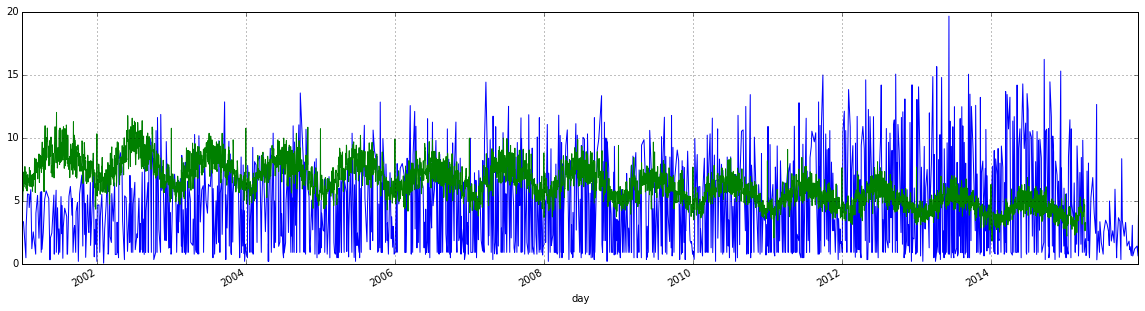

In [1267]:
# ax = v_crimes_per_day.plot()
# ax = plt.plot(v_crimes_per_day)
v_movies_per_day.plot()
# plt.plot(v_movies_per_day)
v_crimes_per_day.div(50).plot(figsize=(20,5))

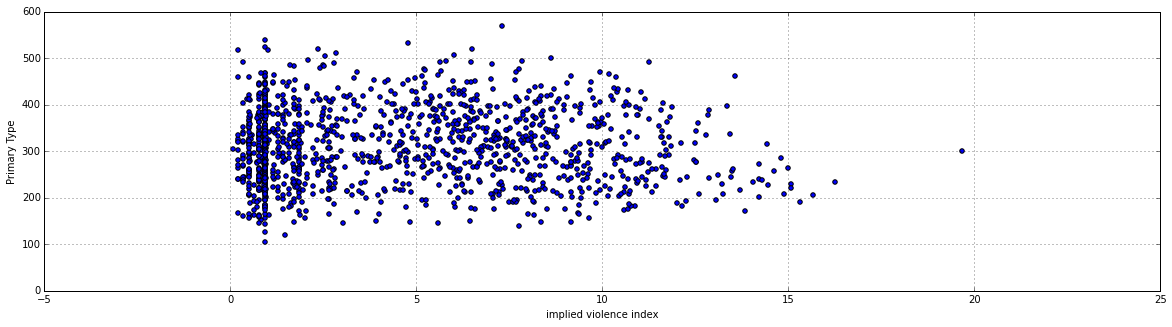

In [1290]:
final_annoying_data = pd.DataFrame(v_movies_per_day).join(v_crimes_per_day).dropna()
final_annoying_data.plot(y='Primary Type', x="implied violence index", kind = "scatter", figsize=(20,5))

In [1291]:
X=final_annoying_data['implied violence index']
Y=final_annoying_data['Primary Type']

final_annoying_data

,implied violence index,Primary Type
opening date,,
2001-01-06,3.362318,365
2001-01-18,0.501035,366
2001-01-19,2.983398,300
2001-01-26,5.564837,342
2001-02-02,5.524544,326
2001-02-03,4.486504,311
2001-02-11,5.909035,328
2001-02-16,1.217391,339
2001-02-23,2.554827,333


In [1296]:
results = sm.OLS( Y, X).fit()
results.summary()
# plt.scatter(X,Y)
# X_plot = np.linspace(0,1,100)
# plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

# plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Primary Type   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1649.
Date:                Tue, 21 Apr 2015   Prob (F-statistic):          1.82e-237
Time:                        19:37:17   Log-Likelihood:                -9329.7
No. Observations:                1373   AIC:                         1.866e+04
Df Residuals:                    1372   BIC:                         1.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
implied violence index    40.2121      0.990     40.614      0.000        38.270    42.154
==============================================================================
Omnibus:                       82.852   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.494
Skew:                          -0.652   Prob(JB):                     6.75e-22
Kurtosis:                       2.965   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""